In [1]:
import pandas as pd
from m2p import PolyMaker
from rdkit import Chem

pm = PolyMaker()

In [12]:
# create dataset
data = pd.DataFrame({'smiles':['C=C','C=CC','O=C(O)c1ccc(C(=O)O)cc1.OCCO','C=C.C=CC']},
                    index=['PE','PP','PET','PE-co-PP'])

# get monomers from smiiles strings
data['monomers'] = data.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
data = pm.thermoplastic(data,DP=5,mechanism='all',replicate_structures=3)

# output
data.head(12)

100%|██████████| 12/12 [00:00<00:00, 24.87it/s]


,smiles,monomers,distribution,replicate_structure,polymer,mechanism
PE,C=C,"('C=C',)",[],0,CCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],0,CCCCC(C)C(C)CCC(C)CC,vinyl
PET,O=C(O)c1ccc(C(=O)O)cc1.OCCO,"('O=C(O)c1ccc(C(=O)O)cc1', 'OCCO')",[],0,O=C(OCCO)c1ccc(C(=O)OCCOC(=O)c2ccc(C(=O)OCCO)c...,ester
PP,C=CC,"('C=CC',)",[],0,CCCCC(C)C(C)CCC(C)CCC,vinyl
PE,C=C,"('C=C',)",[],1,CCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],1,CCC(C)CCCCC(C)C(C)C,vinyl
PET,O=C(O)c1ccc(C(=O)O)cc1.OCCO,"('O=C(O)c1ccc(C(=O)O)cc1', 'OCCO')",[],1,O=C(O)c1ccc(C(=O)OCCOC(=O)c2ccc(C(=O)OCCOC(=O)...,ester
PP,C=CC,"('C=CC',)",[],1,CC(C)CC(C)CC(C)C(C)CC(C)C,vinyl
PE,C=C,"('C=C',)",[],2,CCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],2,CCCCCCCCCCC,vinyl


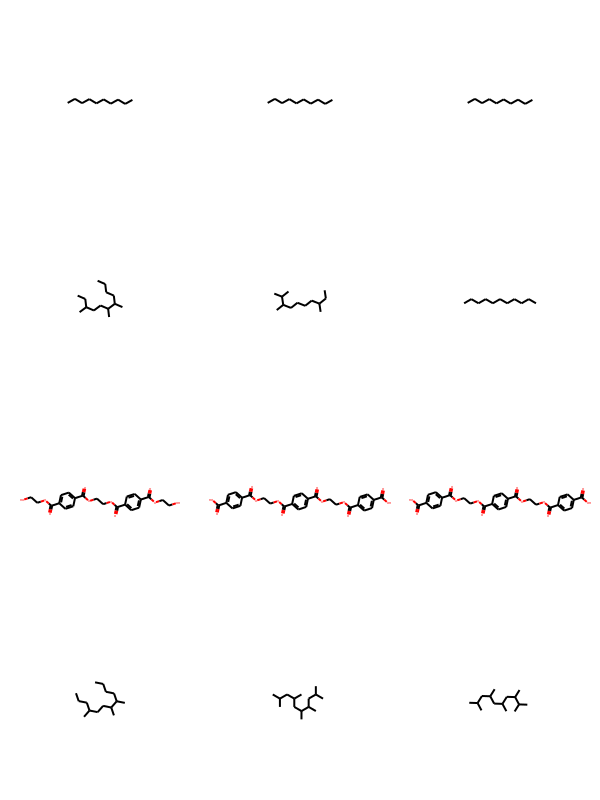

In [13]:
# draw
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in data.sort_index().polymer],molsPerRow=3)